In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [2]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing values found in the dataset

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df["Workclass"]=df["Workclass"].replace(' ?', np.nan)

In [15]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

df.isnull().sum()

In [19]:
df.shape

(32560, 15)

There are missing values in Workclass as we have replaced a incorrect value with NaN

In [21]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
df["Occupation"]=df["Occupation"].replace(' ?', np.nan)
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [25]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [26]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [27]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [28]:
df["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [29]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [30]:
df["Native_country"]=df["Native_country"].replace(' ?', np.nan)

In [31]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [32]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

so from the above we could see that Native country,Occupation and Workclass has missing values after replacing incorrect characters with Nan

In [33]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

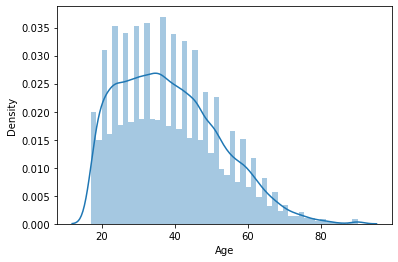

In [35]:
sns.distplot(df["Age"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

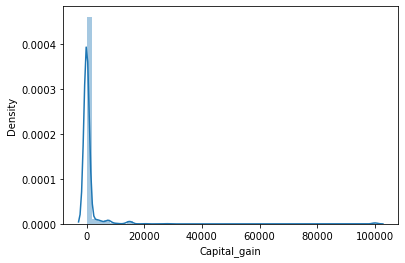

In [36]:
sns.distplot(df["Capital_gain"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

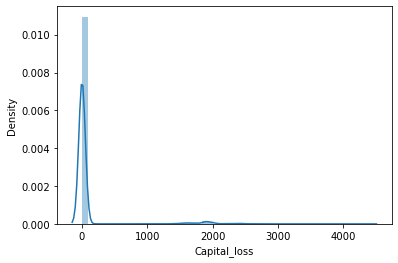

In [37]:
sns.distplot(df["Capital_loss"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

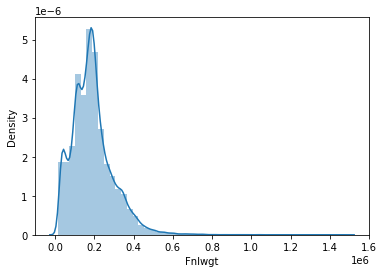

In [38]:
sns.distplot(df["Fnlwgt"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

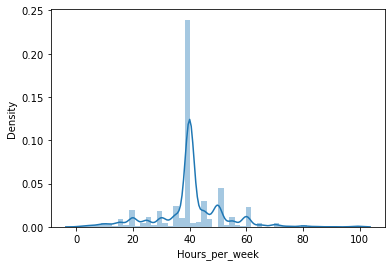

In [39]:
sns.distplot(df["Hours_per_week"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours_per_week'>

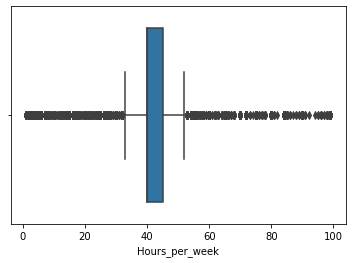

In [40]:
sns.boxplot(df["Hours_per_week"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital_gain'>

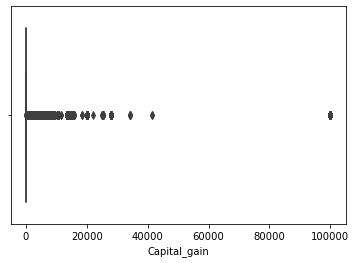

In [41]:
sns.boxplot(df["Capital_gain"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital_loss'>

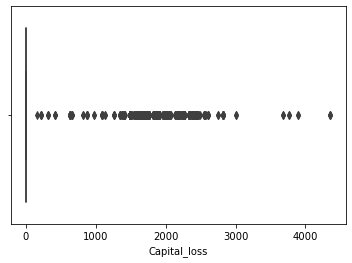

In [42]:
sns.boxplot(df["Capital_loss"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fnlwgt'>

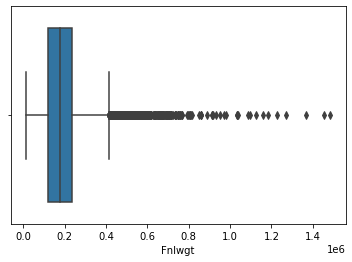

In [43]:
sns.boxplot(df["Fnlwgt"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

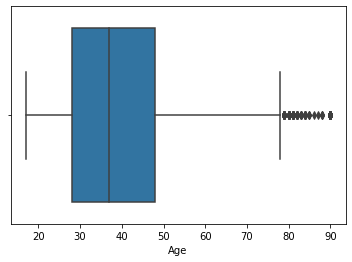

In [44]:
sns.boxplot(df["Age"])

EDA observations
1. Missing values needs to be treated
2. Outliers needs to be treated
3. Encoding Needed
4. Skew ness treatment needed
5. Binary classification algorithm needed as the Target variable is a classifier with 2 values

# Missing values imputation

In [45]:
df["Workclass"]=df["Workclass"].fillna(df["Workclass"].mode()[0])


In [46]:
df["Occupation"]=df["Occupation"].fillna(df["Occupation"].mode()[0])


In [47]:
df["Native_country"]=df["Native_country"].fillna(df["Native_country"].mode()[0])


In [48]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Encoding 

In [49]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


<AxesSubplot:>

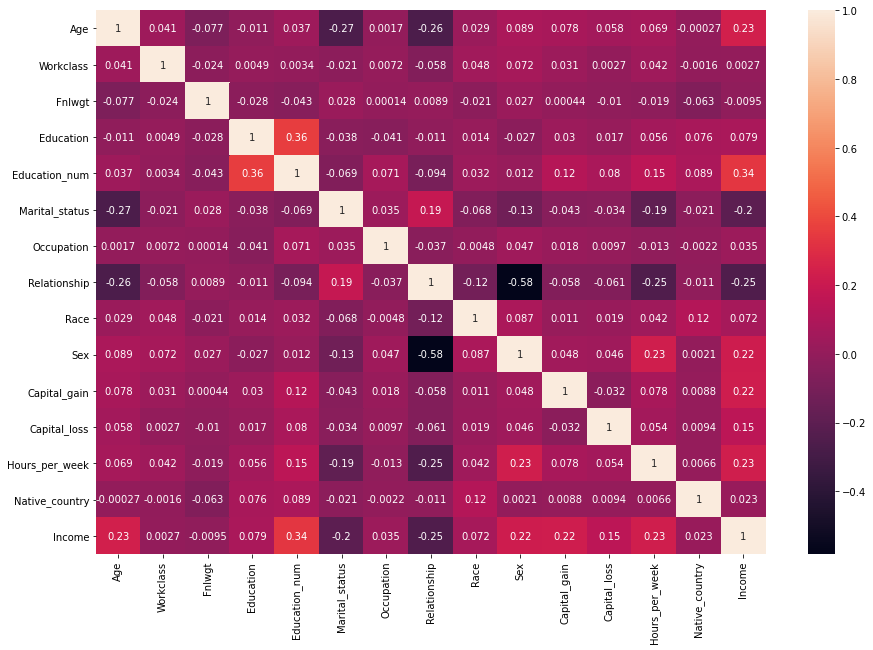

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [76]:
df2=df.drop(["Education"],axis=1)

In [67]:
df1.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education_num,0.036527,0.003445,-0.043159,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995
Capital_gain,0.077674,0.031496,0.000437,0.122627,-0.043398,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.008818,0.223333


In [68]:
df1.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

# Outlier Treatment

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(32560, 14)

In [70]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.837097,1.721336,1.008742,1.134779,0.406183,0.790156,0.900177,0.393675,0.703087,0.145914,0.216663,2.222120,0.261374,0.563210
1,0.042640,0.085223,0.245046,0.420027,1.734026,0.286703,0.277810,0.393675,0.703087,0.145914,0.216663,0.035430,0.261374,0.563210
2,1.057031,0.085223,0.425770,1.197429,0.406183,0.286703,0.900177,1.962583,0.703087,0.145914,0.216663,0.035430,0.261374,0.563210
3,0.775755,0.085223,1.408146,1.134779,0.406183,0.720204,2.211658,1.962583,1.422298,0.145914,0.216663,0.035430,5.352855,0.563210
4,0.115952,0.085223,0.898170,1.523480,0.406183,0.790156,2.211658,0.393675,1.422298,0.145914,0.216663,0.035430,0.261374,0.563210
5,0.763786,0.085223,0.280392,1.974832,0.257739,0.216751,0.277810,1.962583,1.422298,0.145914,0.216663,1.979155,2.380616,0.563210
6,0.983720,1.721336,0.188162,0.420027,0.406183,0.790156,0.900177,0.393675,0.703087,0.145914,0.216663,0.369513,0.261374,1.775537
7,0.555821,0.085223,1.364314,1.523480,0.921660,0.720204,0.277810,0.393675,1.422298,1.761120,0.216663,0.774455,0.261374,1.775537
8,0.250605,0.085223,0.287384,1.134779,0.406183,0.790156,0.900177,0.393675,0.703087,0.555210,0.216663,0.035430,0.261374,1.775537
9,0.115952,0.085223,0.859155,0.031325,0.406183,0.790156,0.900177,1.962583,0.703087,0.145914,0.216663,3.204111,0.261374,1.775537


In [71]:
df1=df1[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38,0


In [60]:
Dataloss=((32560-27770)/32560)*100
Dataloss

14.71130221130221

Dataloss more than 8% so we will not treat outliers

# splitting DataFrame

In [77]:
x=df2.iloc[:,0:13]
y=df2.iloc[:,-1]
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38


# Treating Skewness

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling Data

In [79]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Logistic Regression as only 2 Output values

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [82]:
l=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

At random state: 35
Traning score is :- 82.55528255528255
Test score is :- 82.5859950859951
At random state: 39
Traning score is :- 82.54760442260442
Test score is :- 82.46314496314497
At random state: 59
Traning score is :- 82.55144348894349
Test score is :- 82.5859950859951
At random state: 85
Traning score is :- 82.5284090909091
Test score is :- 82.53992628992629


random state = 85

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=0.20)


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      4985
           1       0.23      0.16      0.19      1527

    accuracy                           0.68      6512
   macro avg       0.50      0.50      0.49      6512
weighted avg       0.64      0.68      0.66      6512



In [86]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 82.47542997542998
Accuracy_score : 82.52457002457002
cv: 3
cross validation score is 82.49386453506214
Accuracy_score : 82.52457002457002
cv: 4
cross validation score is 82.5460687960688
Accuracy_score : 82.52457002457002
cv: 5
cross validation score is 82.49692874692876
Accuracy_score : 82.52457002457002
cv: 6
cross validation score is 82.53378459529178
Accuracy_score : 82.52457002457002
cv: 7
cross validation score is 82.49693090689202
Accuracy_score : 82.52457002457002
cv: 8
cross validation score is 82.5
Accuracy_score : 82.52457002457002
cv: 9
cross validation score is 82.50920041487984
Accuracy_score : 82.52457002457002


CV=4 can be chosen

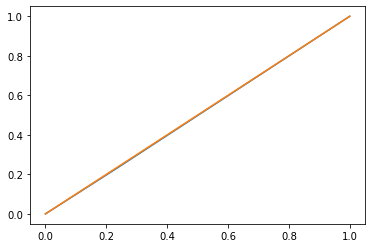

In [88]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

# Random Forest Classifier

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'class_weight':["balanced","balanced_subsample"],'random_state':[85]}
rf =RandomForestClassifier()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'random_state': 2}


In [91]:
rf= RandomForestClassifier(criterion="gini",max_features="auto",class_weight="balanced",random_state=85)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

#rfs = r2_score(y_test,pred_decision)
#print('R2 Score:',rfs*100)

#rfscore = cross_val_score(rf,x_train,y_train,cv=9)

#rfc = rfscore.mean()
#x_predict = rf.predict(x_test)
print(classification_report(pred_decision,y_test))
#print('Cross Val Score:',rfc*100)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5247
           1       0.59      0.71      0.65      1265

    accuracy                           0.85      6512
   macro avg       0.76      0.80      0.78      6512
weighted avg       0.86      0.85      0.85      6512



# Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[85]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 85, 'splitter': 'best'}


In [93]:
from sklearn.metrics import classification_report
DTC1= DecisionTreeClassifier(criterion="gini",max_features="auto",random_state=85,splitter="best")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4909
           1       0.58      0.55      0.57      1603

    accuracy                           0.79      6512
   macro avg       0.72      0.71      0.72      6512
weighted avg       0.79      0.79      0.79      6512



# SVC

In [95]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[85],'shrinking':[True,False]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'gamma': 'auto', 'random_state': 85, 'shrinking': True}


In [96]:
svc= svm.SVC(gamma="auto",random_state=85,shrinking=True)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      5397
           1       0.51      0.70      0.59      1115

    accuracy                           0.83      6512
   macro avg       0.72      0.78      0.74      6512
weighted avg       0.86      0.83      0.84      6512



From the above we can see that Random tree Classifier is the best algorithm

In [97]:
import pickle
filename = 'Cen.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [98]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 0, ..., 1, 1, 0])

In [99]:
predicted=np.array(rf.predict(x_test))
predicted
predicted.shape
rf.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6507,0,0
6508,0,0
6509,1,1
6510,1,0
